# Final Bioinformatics Project

## Katelyn, Hannah, Kathleen, and Grant

### BLAST

- What to do:

    + Using Unix commands, create a single table that includes the top hit for each transcript. 
    
    + Save one fasta file of protein sequences per identified transcript (6 total).

- The final code for this part of the project is __'tophitsscript.sh'__

- The final table for this part of the project is __'tophits.txt'__ in the directory BLAST

#tophitscript.sh

#This script will take the top line or "hit" from each .csv file in the directory and compile them into a new .txt file called
"tophits.txt"

#run in bash

    head -n 1 ./BLAST/*.csv > ./BLAST/tophits.txt

### Translation of RNA Seq Data

- What to do:

    + Use Python to translate nucleotides to amino acids
    
    + __READ__ _codonmap.txt_ and nucleotide file you are translating
    
    + __WRITE__ to a fasta file the translated amino acid sequences
    
    + Use this code in a for loop to translate all four files of RNAseq data
    
    + Translation script is Translate_RNA_Script.py
    
    + Translated RNAseq files end in protein.fasta (ex Control1protein.fasta)
    

In [25]:
"""
Translates all DNA sequences in an arbitrary number of fasta files
into amino acids. Takes fasta file names as command line arguments,
WITHOUT any extension:

USAGE: python Translate_RNA_Script.py fasta1 fasta2 ... fastan

Cannot be run using the run script button in Rodeo or Spyder.
Try running in a terminal.
"""
from __future__ import print_function
import sys

# creates dictionary which contains DNA codon-to-amino acid translations
D = {}
with open('codonmap.txt', 'r') as csv_file:
    for line in csv_file:
        aa, codon = line.split()
        D[codon] = aa

def translate(codex, fasta):
    """
    When passed a full fasta file split by line (i.e. file.read().split()),
    this function translates DNA to Protein up to an
    Amber (TAG), Ochre (TAA), or Umber (TGA) stop codon.
    Returns a list of tab delimited NAME-SEQUENCE pairs.
    """
    sequences = [] # sequential list of protein sequences
    sequence_names = []
    for i, item in enumerate(fasta.read().split()):
        protein = '' # translated protein sequence
        if i%2 == 0: # if index is even, line is seq name
            sequence_names.append(item)
        else: # otherwise, fasta is DNA sequence
            started = False # Initiating met. hasn't been found.
            for j in range(0, len(item), 3): # read by 3s
                res = codex[item[j:j+3]]
                if res == 'M' and not started:
                    started = True # start translating if we find a met.
                    continue
                if started:
                    if res == 'Stop': # stop codon, end translation
                        break
                    else:
                        protein += res # extend translated protein seq.
            sequences.append(protein)
    # return names followed by sequences line-by-line
    return '\n'.join(['{0}\n{1}\n'.format(sequence_names[p],
                                          sequences[p]) for p in range(len(sequences))])

if __name__ == '__main__':
    #read transcript fasta files from system arguments
    try:
        CONDITION_LIST = ['control1', 'control2', 'obese1', 'obese2']
        for condition in CONDITION_LIST:
            with open('fasta/%s.fasta'%condition, 'r') as inFile, \
                open('%sprotein.fasta'%condition.title(), 'w') as outFile:
                # translates and auto-closes both input and output file
                outFile.write(translate(D, inFile))
    except IOError: # If no arguments passed, exit and print error.
        print('Usage: python Translate_RNA_SCript.py fasta1 fasta2... fastan')
        sys.exit()
      

### Hidden Markov Models

- What to do:

    + Use __muscle__ to make an alignment for downloaded protein sequences and translated RNAseq data
    
    + Use __hmmbuild__ to construct six protein models
    
    + Use __hmmsearch__ to search the translated RNAseq files for each of the protein models made
    
    + Use a bash script to loop over the transcript files and RNAseq files

- Final code for this part is in __'muscle_hmm_script.sh'__

- Final files for this part are are the align directory (muscle alignment) the hmm directory (hmmbuild) and the hmmoutput directory (hmmseach)

#!/bin/bash
#Muscle alignment for protein files from BLAST
#Build hmm for alignments
#Path for muscle/hmmbuild may be different depending on where binaries are

    for sequence in $(ls | egrep '_[0-9]{1,2}\.fasta$') 
    do
	./align/muscle.exe -in $sequence -out ./align/$sequence.align
    done

    for alignment in $(ls ./align/ | egrep '_[0-9]{1,2}\.fasta.align$')
    do
    ./hmm/hmmbuild.exe ./hmm/$alignment.hmm ./align/$alignment
    done

    for build in $(ls | egrep 'protein.fasta$')
    do
        for seq in "Atp12a_8" "Gsta2_1" "Lhx2_9" "Ptpn5_6" "Slc7a12_2" "Synpr_10"
        do
		./hmm/hmmsearch.exe --tblout ./hmmoutput/$build.$seq.out ./hmm/$seq.fasta.align.hmm ./$build
        done
    done

### Graphing of "expression levels"

- What to do:

    + Graph the counts of the hmm hits for each transcript [our measure of RNA expression] in each RNAseq file
    
    + Compare the expression levels across the 2 normal and 2 obese mice
    
    + Qualitatively compare our results to those reported in Kuhns & Pluznick (2017)
   
- Final code uses __'hit_count_graph.py'__ script

- Comparison between our graph and Kuhns&Pluznick (2017)

    + Synpr - We were able to recapitulate the data presented by Kuhns&Pluznick (2017). Expression of this gene increased in obese mice compared to the control mice according to RNAseq data.
    
    + Slc7a12 - We were able to recapitulate the data presented by Kuhns&Pluznick (2017). Expression of this gene stayed relatively the same between obese and control mice according to RNAseq data.
    
    + Ptpn5 - Our data suggested that gene expression remained relatively the same, but the data in Kuhns&Pluznick suggested a 10-fold increase in expression in obese mice.
    
    + Lhx2 - We were able to recapitulate the data presented by Kuhns&Pluznick (2017). Expression of this gene increased in obese mice compared to the control mice according to RNAseq data.
    
    + Gsta2 - Our data suggested that gene expression decreased significantly in obese mice compared to control mice, but the data in Kuhns&Pluznick suggested expression remained relatively the same between obese and control mice.
    
    + Atp12a - We were able to recapitulate the data presented by Kuhns&Pluznick (2017). Expression of this gene increased in obese mice compared to the control mice according to RNAseq data.

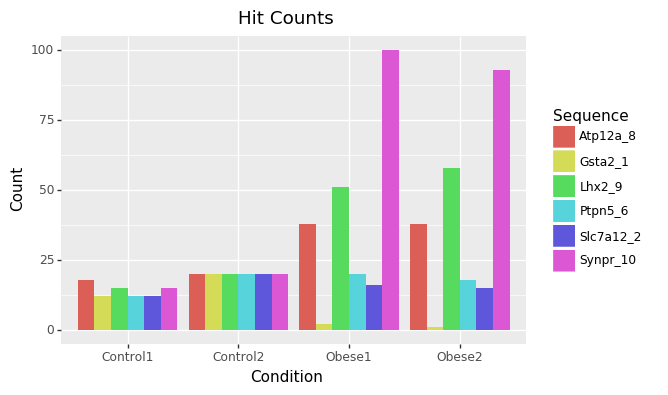

<ggplot: (8611963)>


In [26]:
import pandas
from plotnine import *
c=pandas.read_csv("hmmoutput/RNAseq_counts.csv", sep=',', names = ["Condition","Sequence","Count"])

plot = (ggplot(c,aes(x='Condition',y='Count',fill='Sequence'))+geom_bar(stat='identity',position='dodge')+ggtitle("Hit Counts"))
print(plot)

### Further Exploration

1. What to do:

    + For 2-3 of the 6 transcripts, return to the original BLAST search and change the _Optimize for_ option. It might be eaiser to explore if you also restrict the _Database_ option to either human or mouse
    
    + How do _discontinuous megablast_ and _blastn_ change your table of BLAST hits?
    
        + _uniquetranscripts.fasta_ with _Mouse genomic + transcript_ database and _discontiguous megablast_
        
        + _uniquetranscripts.fasta_ with _Mouse genomic + transcript_ database and _blastn_
        
        + __Answer__: Since we are using RNAseq data from mice, using the _Mouse genomic + transcript_ option gives us sequences from BLAST that are more closely related to the sequences we search. However, when we change the optimization our results differ. When we optimize for _discontiguous megablast_, the BLAST results were more variable - we didn't have as phylogenetically close matches as we did with the _megablast_. The trend was even more dramatic when we optimized using _blastn_. This search allowed for very small contig matches that were more phylogenetically distant to our RNAseq data.
    
2. What to do:

    + For 2-3 of the 6 trnascripts, return to NCBI protein search and explore the effects of phylogenetic relatedness of your amino acid sequences on the performance of your HMM model
    
    + What would happen if you built your HMM protein model using more distantly related mammals (ex primates)? Would you still get the same quality of hits if your HMM protein model was based on non-mammalian sequences?
    
        + __Answer:__ When completing alignments, there is a basic assumption that all sequences you are using are related (ie 'descended from a common ancestor'). As you include more distantly related organisms, you would assume that the hits would decrease in quality - there would be more gaps, insertions, deletions, etc. - which would alter how the HMM model would function. However, this is contingent upon what gene/protein you are looking at: a highly conserved gene may not have very many mutations, so you still get high-quality hits when using distantly related organisms.
    
    + Pick one of the RNAseq files to search in order to test your hypotheses. Compate e-values among HMMs built from differing taxa.
    
        + __Answer__ We used the Atp12a transcript with a primate model and a non-mammalian model. The Atp12a gene codes for an ATPase, so we would assume that the gene would be conserved due to its importance. When we built the HMM model using primates, we got an e-value of 0. When we built the HMM model using non-mammals, the e-value was still 0. This makes sense because of how conserved we believe the gene should be.